### Exercitiul 1

a)

In [31]:
import pandas as pd

cale_fisier = 'auto-mpg.csv'

# Încărcarea datelor din fișierul CSV într-un DataFrame
df = pd.read_csv(cale_fisier)

print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        131    3504          12.0          70   
1  15.0          8         350.0        136    3693          11.5          70   
2  18.0          8         318.0        134    3436          11.0          70   
3  16.0          8         304.0        134    3433          12.0          70   
4  17.0          8         302.0        132    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [32]:
# Verificam daca exista valori lipsa
print('Numarul valorilor lipsa pentru fiecare variabila:')
print(df.isnull().sum())

Numarul valorilor lipsa pentru fiecare variabila:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [33]:
# Numărul de duplicate
num_duplicates = df.duplicated().sum()
print("Număr de duplicate:", num_duplicates)


Număr de duplicate: 0


In [34]:
# Identifică variabilele numerice
variabile_numerice = df.select_dtypes(include=['int64', 'float64']).columns
print("Variabile numerice:", list(variabile_numerice))

# Identifică variabilele categorice
variabile_categorice = df.select_dtypes(include=['object']).columns
print("Variabile categorice:", list(variabile_categorice))

Variabile numerice: ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']
Variabile categorice: ['horsepower', 'car name']


In [35]:
for col in df.columns:
    print(f"{col}: {df[col].dtype}, {df[col].nunique()} valori unice")

mpg: float64, 129 valori unice
cylinders: int64, 5 valori unice
displacement: float64, 82 valori unice
horsepower: object, 37 valori unice
weight: int64, 351 valori unice
acceleration: float64, 95 valori unice
model year: int64, 13 valori unice
origin: int64, 3 valori unice
car name: object, 305 valori unice


In [36]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"'{col}': {len(outliers)} valori aberante")

'mpg': 1 valori aberante
'cylinders': 0 valori aberante
'displacement': 0 valori aberante
'weight': 0 valori aberante
'acceleration': 7 valori aberante
'model year': 0 valori aberante
'origin': 0 valori aberante


In [37]:
# Parcurgem toate coloanele numerice și eliminăm valorile aberante
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Păstrează doar rândurile care nu au valori aberante pentru această coloană
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"'{col}': {len(outliers)} valori aberante")


'mpg': 0 valori aberante
'cylinders': 0 valori aberante
'displacement': 0 valori aberante
'weight': 0 valori aberante
'acceleration': 0 valori aberante
'model year': 0 valori aberante
'origin': 0 valori aberante


In [38]:
df['mpg'].unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 18.5, 29.5, 26.5,
       16.5, 31.5, 36. , 25.5, 33.5, 20.5, 24.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 27.9, 40.8, 44.3, 36.4,
       44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8, 23.5, 39.1,
       39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9, 31.6, 28.1,
       30.7, 24.2, 22.4, 34. , 38. ])

In [39]:
df['horsepower'].unique()

array(['131', '136', '134', '132', '140', '142', '143', '137', '124',
       '121', '122', '108', '123', '128', '141', '139', '?', '125', '126',
       '138', '127', '118', '117', '119', '116', '114', '120', '135',
       '133', '110', '129', '111', '113', '115', '109', '130'],
      dtype=object)

Se observa ca exista instante care au valoarea '?' pentru horsepower. Astfel, verificat cate astfel de instante exista in tot dataframe-ul.

In [40]:
# Numărăm instanțele cu valoarea '?'
num_question_marks = (df['horsepower'] == '?').sum()
print(f"Numărul de instanțe cu valoarea '?': {num_question_marks}")

Numărul de instanțe cu valoarea '?': 6


Intrucat nu sunt multe astfel de instante, alegem sa le stergem.

In [41]:
# Eliminăm toate rândurile unde coloana 'horsepower' este egală cu '?'
df = df[df['horsepower'] != '?']

In [42]:
df['horsepower'] = df['horsepower'].astype(int)

df['horsepower'].unique()


array([131, 136, 134, 132, 140, 142, 143, 137, 124, 121, 122, 108, 123,
       128, 141, 139, 125, 126, 138, 127, 118, 117, 119, 116, 114, 120,
       135, 133, 110, 129, 111, 113, 115, 109, 130])

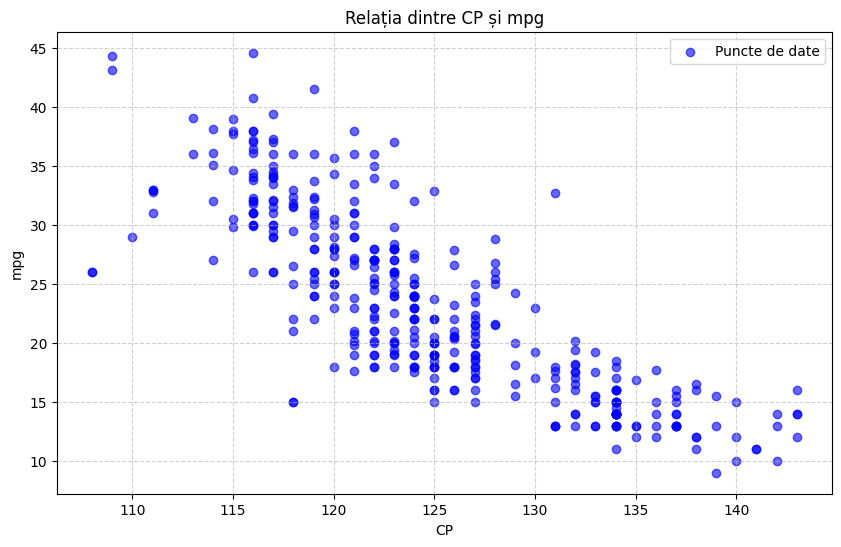

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Variabile independente și dependente
variabila_independenta = 'horsepower'  # Variabila numerică obținută
variabila_dependenta = 'mpg'

X = df[variabila_independenta].values.reshape(-1, 1)  # Reshape pentru regresie
y = df[variabila_dependenta].values  # Vector

# Reprezentare grafică
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Puncte de date')  # Punctele albastre
plt.xlabel('CP')
plt.ylabel('mpg')
plt.title('Relația dintre CP și mpg')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

b)

In [44]:
import pymc as pm

# Definirea datelor pentru model
x = df['horsepower']
y = df['mpg']

with pm.Model() as model:
    alpha = pm.Normal('alpha', mu = 0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    mu = pm.Deterministic('mu', alpha + beta * x)
    y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y)

    idata_g = pm.sample(2000, tune=2000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, epsilon]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 40 seconds.


<Axes: xlabel='alpha', ylabel='beta'>

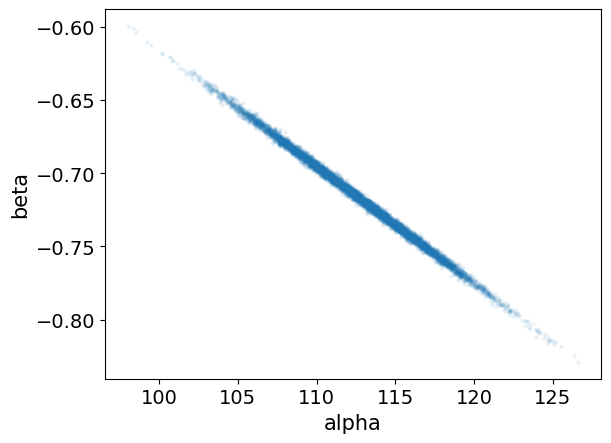

In [45]:
import arviz as az

az.plot_pair(idata_g, var_names=['alpha', 'beta'], scatter_kwargs={'alpha': 0.1})

c)

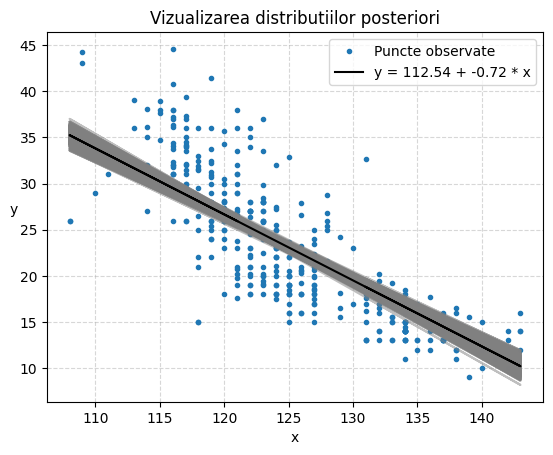

In [46]:
import matplotlib.pyplot as plt

# Posterior samples
posterior_g = idata_g.posterior.stack(samples={"chain", "draw"})
alpha_m = posterior_g['alpha'].mean().item()
beta_m = posterior_g['beta'].mean().item()
draws = range(0, len(posterior_g['alpha']), 10)  # Extragem mostrele

# Plot puncte
plt.plot(x, y, 'C0.', label='Puncte observate')

# Plot regresii din posterior
for alpha, beta in zip(posterior_g['alpha'].isel(samples=draws),
                       posterior_g['beta'].isel(samples=draws)):
    plt.plot(x, alpha.values + beta.values * x, c='gray', alpha=0.5)

# Plot regresia medie
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

# Stil grafic
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Vizualizarea distributiilor posteriori')
plt.show()

d)

Sampling: [y_pred]


Output()

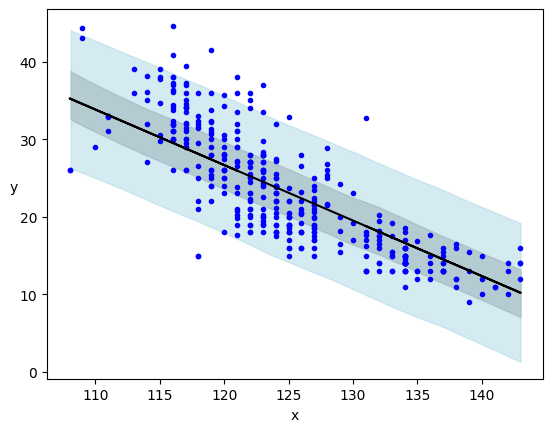

In [47]:
# Generăm predicțiile posterioare
ppc = pm.sample_posterior_predictive(idata_g, model=model)

# Plot puncte observate
plt.plot(x, y, 'b.')

# Plot linia medie de regresie
plt.plot(x, alpha_m + beta_m * x, c='k', 
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

# Plot HDI 50%
az.plot_hdi(x, ppc.posterior_predictive['y_pred'], hdi_prob=0.5, color='gray')

# Plot HDI 95%
az.plot_hdi(x, ppc.posterior_predictive['y_pred'], hdi_prob=0.95, color='lightblue')

# Stilizare grafic
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.show()

Concluzii:
- modelul urmeaza o regresie liniara negativa
- atunci cand numarul de cai putere a unei masini creste, cantitatea de combustibil scade

### Exercitiul 2

a)

In [48]:
publicitate = [1.5, 2.0, 2.3, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0]
vanzare = [5.2, 6.8, 7.5, 8.0, 9.0, 10.2, 11.5, 12.0, 13.5, 14.0, 14.0, 15.0, 15.5, 16.2, 18.0, 18.5, 19.5, 20.0, 21.0, 22.0]

# Creăm DataFrame-ul
df = pd.DataFrame({
    'publicitate': publicitate,
    'vanzare': vanzare
})

# Definirea datelor pentru model
x = df['publicitate']
y = df['vanzare']

with pm.Model() as model:
    alpha = pm.Normal('alpha', mu = 0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    mu = pm.Deterministic('mu', alpha + beta * x)
    y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y)

    idata_g = pm.sample(2000, tune=2000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, epsilon]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 21 seconds.


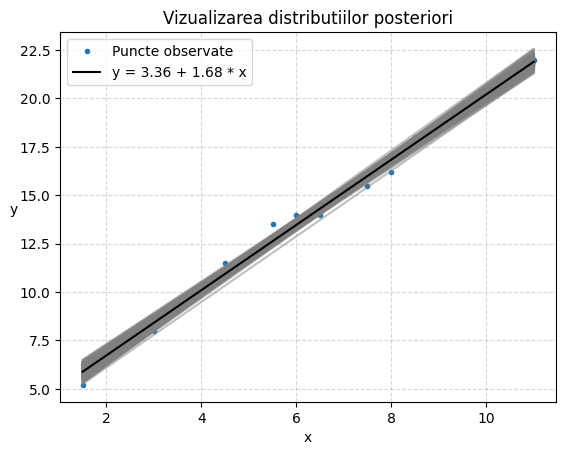

In [56]:
# Posterior samples
posterior_g = idata_g.posterior.stack(samples={"chain", "draw"})
alpha_m = posterior_g['alpha'].mean().item()
beta_m = posterior_g['beta'].mean().item()
draws = range(0, len(posterior_g['alpha']), 10)  # Extragem mostrele

# Plot puncte
plt.plot(x, y, 'C0.', label='Puncte observate')

# Plot regresii din posterior
for alpha, beta in zip(posterior_g['alpha'].isel(samples=draws),
                       posterior_g['beta'].isel(samples=draws)):
    plt.plot(x, alpha.values + beta.values * x, c='gray', alpha=0.5)

# Plot regresia medie
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

# Stil grafic
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Vizualizarea distributiilor posteriori')
plt.show()

b)

In [68]:
az.summary(idata_g, var_names=['alpha', 'beta', 'epsilon'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,3.356,0.243,2.895,3.822,0.005,0.003,2644.0,2810.0,1.0
beta,1.685,0.035,1.620,1.756,0.001,0.000,2653.0,3100.0,1.0
epsilon,0.453,0.083,0.306,0.604,0.001,0.001,3515.0,3698.0,1.0


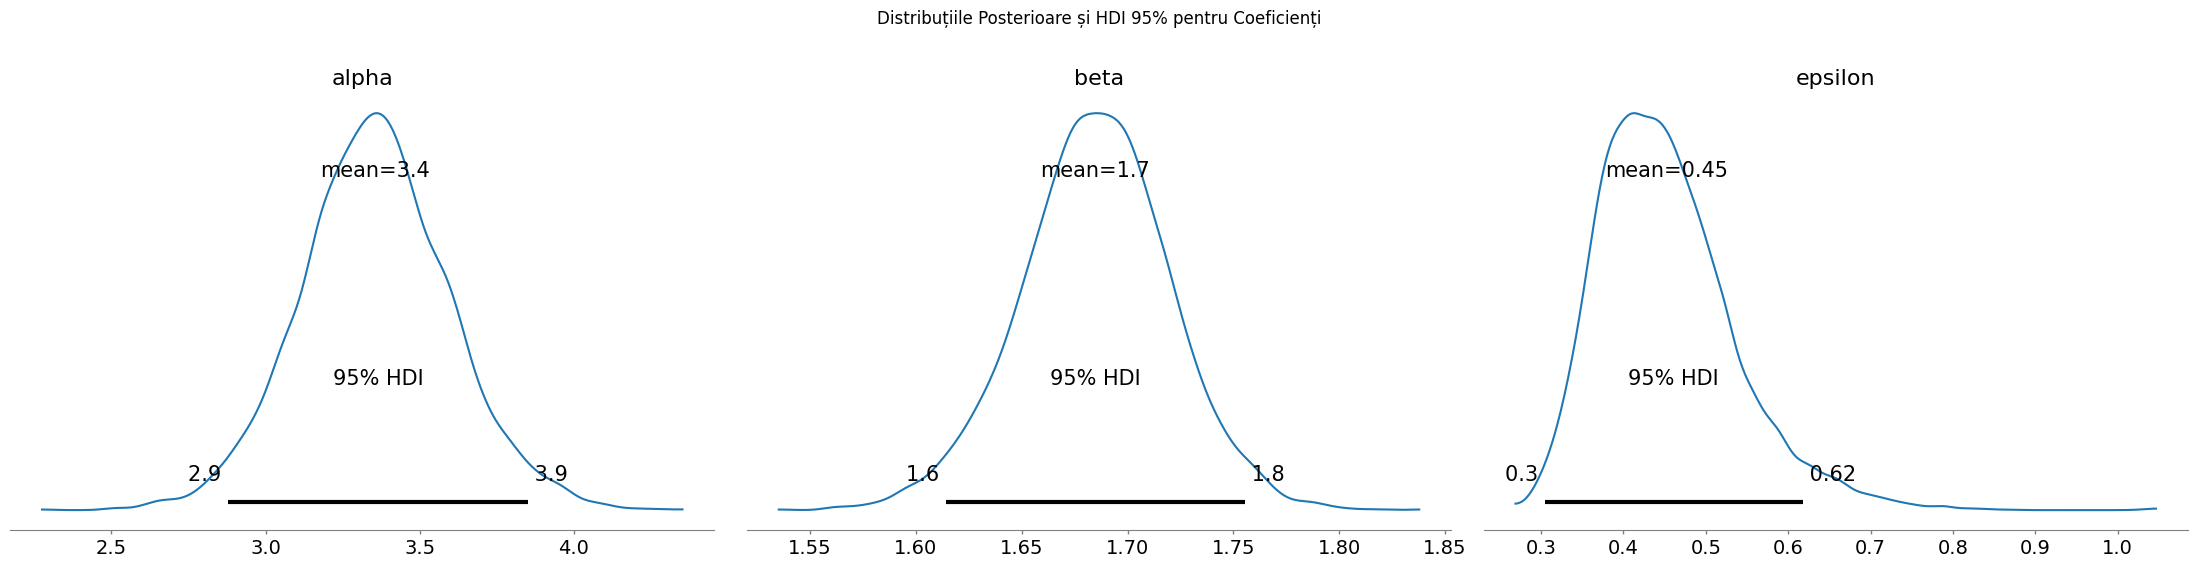

In [63]:
# Calculăm intervalele de credibilitate (HDI 95%)
alpha_hdi = az.hdi(idata_g.posterior["alpha"], hdi_prob=0.95)
beta_hdi = az.hdi(idata_g.posterior["beta"], hdi_prob=0.95)
epsilon_hdi = az.hdi(idata_g.posterior["epsilon"], hdi_prob=0.95)

# Vizualizare distribuții posterioare
az.plot_posterior(idata_g, var_names=["alpha", "beta", "epsilon"], hdi_prob=0.95)

# Adăugăm titlu general
plt.suptitle("Distribuțiile Posterioare și HDI 95% pentru Coeficienți", y=1.02)
plt.tight_layout()
plt.show()

c)